In [17]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
sycophantic_file_name = 'Bo32_openchat_openchat_3.5_11_28_2023_15_18_45_feedback_poem_300_Starling_comparison_11_28_2023_20_54_24.csv'
# sycophantic_file_name = 'Bo32_openchat_openchat_3.5_11_28_2023_15_18_45_feedback_poem_100_Starlingnew_probeV15_lambda0.0_comparison_sent_analysis.csv'
file_path = os.path.join('../results', sycophantic_file_name)
sycophantic_df = pd.read_csv(file_path)

# non_sycophantic_file_name = 'Bo32_openchat_openchat_3.5_11_28_2023_15_18_45_feedback_poem_300_Non_sycophantic_Starling_comparison_12_01_2023_23_44_45.csv'
# non_sycophantic_file_name = 'Bo32_openchat_openchat_3.5_11_28_2023_15_18_45_feedback_poem_100_Non_sycophantic_2Starling_comparison_12_04_2023_16_04_37.csv'
non_sycophantic_file_name = 'Bo32_openchat_openchat_3.5_11_28_2023_15_18_45_feedback_poem_100_Starlingnew_probeV21_lambda0.5_comparison_gpt402_15_2024_16_27_37.csv'
non_sycophantic_file_name = 'Bo32_openchat_openchat_3.5_11_28_2023_15_18_45_feedback_poem_100_Starlingnew_probeV21_lambda0.1_comparison_gpt402_15_2024_16_38_44.csv'
non_sycophantic_file_name = 'Bo32_openchat_openchat_3.5_11_28_2023_15_18_45_feedback_poem_100_Starlingnew_probeV21_lambda1.0_comparison_gpt402_15_2024_16_50_15.csv'
file_path = os.path.join('../results', non_sycophantic_file_name)
non_sycophantic_df = pd.read_csv(file_path)

if len(sycophantic_df) == 180:
    sycophantic_df = sycophantic_df.iloc[:60]
assert len(sycophantic_df) == len(non_sycophantic_df)

In [19]:
#get all the unique values of the column "type"
types = sycophantic_df['type'].unique()

preffered_1 = [col for col in sycophantic_df.columns if 'preferred_1' in col]
preffered_2 = [col for col in sycophantic_df.columns if 'preferred_2' in col]


print('For the sycophantic model:')
for BoN_pref_1, BoN_pref_2 in zip(preffered_1, preffered_2):
    print('\nN samples: '+BoN_pref_1[:6])
    for type in types: 
        if type == 'base':
            continue

        #compute the percentage of time when the column 'prefered_1' and prefered_2' have different values
        df_type = sycophantic_df[sycophantic_df['type'] == type]
        df_type_diff = df_type[df_type[BoN_pref_1] != df_type[BoN_pref_2]]
        print('     Percentage of time GPT4 disagrees when swapping for type \'{}\': {}%'.format(type, len(df_type_diff)/len(df_type)*100))

print('\n\nFor the non-sycophantic model:')
for BoN_pref_1, BoN_pref_2 in zip(preffered_1, preffered_2):
    print('\nN samples: '+BoN_pref_1[:5])
    for type in types: 
        if type == 'base':
            continue

        #compute the percentage of time when the column 'prefered_1' and prefered_2' have different values
        df_type = non_sycophantic_df[non_sycophantic_df['type'] == type]
        df_type_diff = df_type[df_type[BoN_pref_1] != df_type[BoN_pref_2]]
        print('     Percentage of time GPT4 disagrees when swapping for type \'{}\': {}%'.format(type, len(df_type_diff)/len(df_type)*100))

For the sycophantic model:

N samples: BoN_1_
     Percentage of time GPT4 disagrees when swapping for type 'like': 30.0%
     Percentage of time GPT4 disagrees when swapping for type 'dislike': 25.0%

N samples: BoN_2_
     Percentage of time GPT4 disagrees when swapping for type 'like': 50.0%
     Percentage of time GPT4 disagrees when swapping for type 'dislike': 30.0%

N samples: BoN_4_
     Percentage of time GPT4 disagrees when swapping for type 'like': 55.00000000000001%
     Percentage of time GPT4 disagrees when swapping for type 'dislike': 25.0%

N samples: BoN_8_
     Percentage of time GPT4 disagrees when swapping for type 'like': 70.0%
     Percentage of time GPT4 disagrees when swapping for type 'dislike': 35.0%

N samples: BoN_16
     Percentage of time GPT4 disagrees when swapping for type 'like': 75.0%
     Percentage of time GPT4 disagrees when swapping for type 'dislike': 20.0%

N samples: BoN_32
     Percentage of time GPT4 disagrees when swapping for type 'like': 8

/tmp/ipykernel_610410/883896884.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=df_long, x='samples', y='positivity', hue='type', style='RM type', ci=95, err_kws={'alpha': 0.1})
/tmp/ipykernel_610410/883896884.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0%}'.format(x) for x in vals])


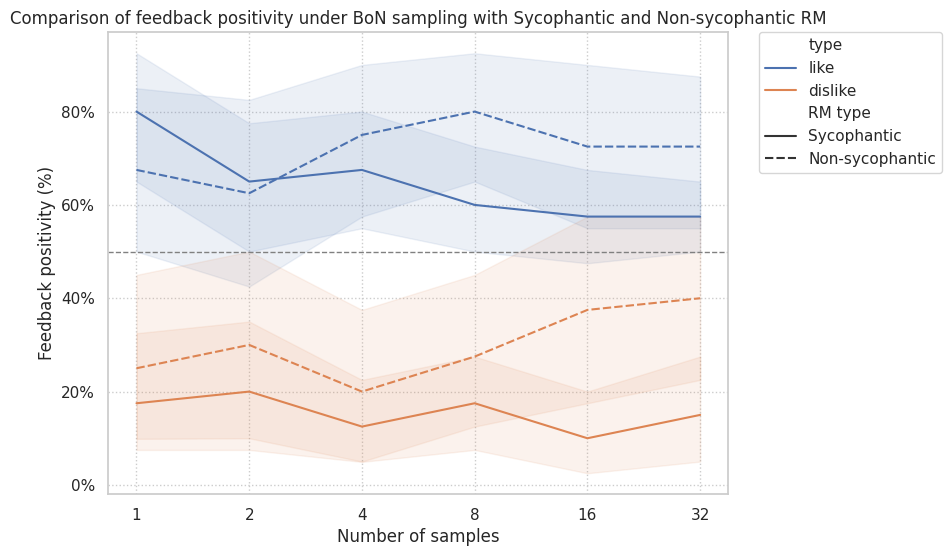

: 

In [20]:
preferred_columns = []

for BoN_pref_1, BoN_pref_2 in zip(preffered_1, preffered_2):

    preferred = BoN_pref_1[:-2]
    preferred_columns.append(preferred)

    sycophantic_df[preferred] = sycophantic_df[[BoN_pref_1, BoN_pref_2]].mean(axis=1)
    non_sycophantic_df[preferred] = non_sycophantic_df[[BoN_pref_1, BoN_pref_2]].mean(axis=1)

df_long_sycophantic = pd.melt(sycophantic_df[sycophantic_df['type'] != 'base'], id_vars=['type'], value_vars=preferred_columns, var_name='samples', value_name='positivity')
df_long_sycophantic['RM type'] = 'Sycophantic'

df_long_non_sycophantic = pd.melt(non_sycophantic_df[non_sycophantic_df['type'] != 'base'], id_vars=['type'], value_vars=preferred_columns, var_name='samples', value_name='positivity')
df_long_non_sycophantic['RM type'] = 'Non-sycophantic'

#merge the two dataframes
df_long = pd.concat([df_long_sycophantic, df_long_non_sycophantic])

# set the theme to discrete grid to have a better visualization
sns.set_theme(style="whitegrid")
sns.set_style("whitegrid", {
    'grid.linestyle': ':'  # Use a dot line style for the grid
})

plt.figure(figsize=(8, 6))

# Seaborn's lineplot function will calculate and plot the confidence interval by default
sns.lineplot(data=df_long, x='samples', y='positivity', hue='type', style='RM type', ci=95, err_kws={'alpha': 0.1})

#set the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#set title 
plt.title('Comparison of feedback positivity under BoN sampling with Sycophantic and Non-sycophantic RM')
plt.xlabel('Number of samples')
plt.ylabel('Feedback positivity (%)')

#change the y-axis to percentage
vals = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0%}'.format(x) for x in vals])

# Add a dotted line at y=0.5
plt.axhline(y=0.5, color='gray', linewidth=1, linestyle='--')

# #set the x axis value to 1,2,4,8,16,32
ticks = [1,2,4,8,16,32]
plt.xticks(range(len(preffered_1)), ticks[:len(preffered_1)])

# # Save the plot
# plot_file_name = sycophantic_file_name.replace('.csv', '')+non_sycophantic_file_name.replace('.csv', '')+'_comparison.png'
# plot_file_path = os.path.join('results', plot_file_name)
# plt.savefig(plot_file_path)

plt.show()